<a href="https://colab.research.google.com/github/zaedulislam/ConU_INSE_6220-Advanced_Statistical_Approaches_to_Quality/blob/main/Tutorial%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Libraries

In [65]:
!pip install pyspc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import numpy as np

#  matplotlib - The Python library is needed to plot nice charts
import matplotlib.pyplot as plt

# 'seaborn' - a matplotlib based statistical graphical library
import seaborn as sns; 
sns.set() # Use seaborn plotting style defaults

# Open source data analysis and manipulation library for Python
import pandas as pd

# The exclamation mark is used for executing commands from the underlying operating system
!python --version

from google.colab import files
from pyspc import spc, xbar_rbar, rbar, rules

Python 3.7.14


In [67]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [79]:
df = pd.read_csv('customers.csv', index_col=0)
print(df)

     X1   X2   X3   X4
0   7.2  8.4  7.9  4.9
1   5.6  8.7  3.3  4.2
2   5.5  7.3  3.2  6.0
3   4.4  8.0  5.4  7.4
4   9.7  4.6  4.8  5.8
5   8.3  8.9  9.1  6.2
6   4.7  6.6  5.3  5.8
7   8.8  5.5  8.4  6.9
8   5.7  4.7  4.1  4.6
9   4.9  6.2  7.8  8.7
10  7.1  6.3  8.2  5.5
11  7.1  5.8  6.9  7.0
12  6.7  6.9  7.0  9.4
13  5.5  6.3  3.2  4.9
14  4.9  5.1  3.2  7.6
15  3.7  4.0  3.0  5.2
16  2.6  3.9  5.2  4.8
17  4.6  2.7  6.3  3.4
18  7.2  8.0  4.1  5.9
19  6.1  3.4  7.2  5.9


# DataFrame to CSV file

In [69]:
data = np.array([
                [7.2, 8.4, 7.9, 4.9], 
                [5.6, 8.7, 3.3, 4.2],
                [5.5, 7.3, 3.2, 6.0],
                [4.4, 8.0, 5.4, 7.4],
                [9.7, 4.6, 4.8, 5.8],
                [8.3, 8.9, 9.1, 6.2],
                [4.7, 6.6, 5.3, 5.8],
                [8.8, 5.5, 8.4, 6.9],
                [5.7, 4.7, 4.1, 4.6],
                [4.9, 6.2, 7.8, 8.7],
                [7.1, 6.3, 8.2, 5.5],
                [7.1, 5.8, 6.9, 7.0],
                [6.7, 6.9, 7.0, 9.4],
                [5.5, 6.3, 3.2, 4.9],
                [4.9, 5.1, 3.2, 7.6],
                [3.7, 4.0, 3.0, 5.2],
                [2.6, 3.9, 5.2, 4.8],
                [4.6, 2.7, 6.3, 3.4],
                [7.2, 8.0, 4.1, 5.9],
                [6.1, 3.4, 7.2, 5.9]
                 ])

dataset = pd.DataFrame(data, columns=['X1', 'X2', 'X3', 'X4'])
print(dataset)

     X1   X2   X3   X4
0   7.2  8.4  7.9  4.9
1   5.6  8.7  3.3  4.2
2   5.5  7.3  3.2  6.0
3   4.4  8.0  5.4  7.4
4   9.7  4.6  4.8  5.8
5   8.3  8.9  9.1  6.2
6   4.7  6.6  5.3  5.8
7   8.8  5.5  8.4  6.9
8   5.7  4.7  4.1  4.6
9   4.9  6.2  7.8  8.7
10  7.1  6.3  8.2  5.5
11  7.1  5.8  6.9  7.0
12  6.7  6.9  7.0  9.4
13  5.5  6.3  3.2  4.9
14  4.9  5.1  3.2  7.6
15  3.7  4.0  3.0  5.2
16  2.6  3.9  5.2  4.8
17  4.6  2.7  6.3  3.4
18  7.2  8.0  4.1  5.9
19  6.1  3.4  7.2  5.9


## Download As a CSV File

In [70]:
dataset.to_csv('customers.csv')
files.download('customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Pairplot
Plot pairwise relationships in a dataset.

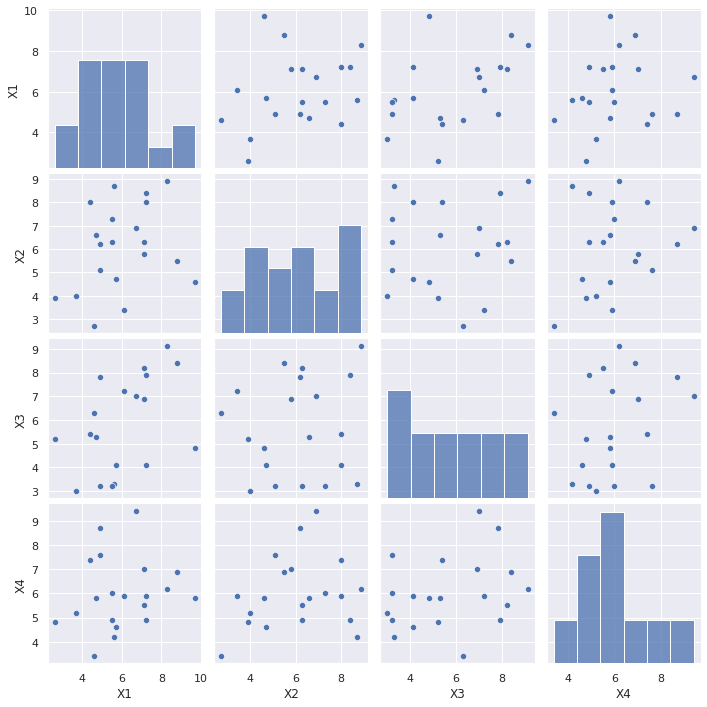

In [71]:
sns.pairplot(dataset)

# Correlation Matrix

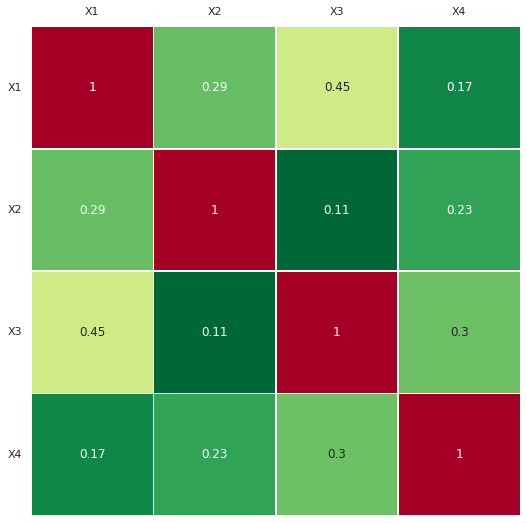

In [83]:
plt.figure(figsize=(16, 9))

ax = sns.heatmap(df.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)

plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)

# Control Charts

In [80]:
print(df)

     X1   X2   X3   X4
0   7.2  8.4  7.9  4.9
1   5.6  8.7  3.3  4.2
2   5.5  7.3  3.2  6.0
3   4.4  8.0  5.4  7.4
4   9.7  4.6  4.8  5.8
5   8.3  8.9  9.1  6.2
6   4.7  6.6  5.3  5.8
7   8.8  5.5  8.4  6.9
8   5.7  4.7  4.1  4.6
9   4.9  6.2  7.8  8.7
10  7.1  6.3  8.2  5.5
11  7.1  5.8  6.9  7.0
12  6.7  6.9  7.0  9.4
13  5.5  6.3  3.2  4.9
14  4.9  5.1  3.2  7.6
15  3.7  4.0  3.0  5.2
16  2.6  3.9  5.2  4.8
17  4.6  2.7  6.3  3.4
18  7.2  8.0  4.1  5.9
19  6.1  3.4  7.2  5.9


In [85]:
X = np.array(df)
Xbar = np.mean(X, axis=1)
print(Xbar)
Xbarbar = np.mean(Xbar)

R = np.ptp(X, axis=1)
Rbar = np.mean(R)
d2 = 2.059
sigmahat = Rbar/d2
print('The process mean and standard deviation are:')
print('Xbarbar = {0:.2f}, sigmahat = {1:.2f}'.format(Xbarbar, sigmahat))

[7.1   5.45  5.5   6.3   6.225 8.125 5.6   7.4   4.775 6.9   6.775 6.7
 7.5   4.975 5.2   3.975 4.125 4.25  6.3   5.65 ]
The process mean and standard deviation are:
Xbarbar = 5.94, sigmahat = 1.59


<Figure size 1152x648 with 0 Axes>

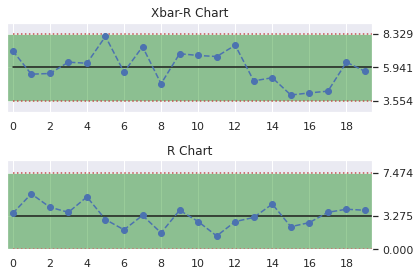

<pyspc: (8734097909925)>


In [84]:
plt.figure(figsize=(16, 9))
chart = spc(X) + xbar_rbar() + rbar() + rules()
print(chart)

In [ ]:
LSL = 1;  USL = 11
Cp = (USL-LSL)/(6*sigmahat)
CpL = (Xbarbar-LSL)/(3*sigmahat)
CpU = (USL-Xbarbar)/(3*sigmahat)
Cpk = np.min([CpL, CpU])
print('The process capability indices are:')
print('Cp = {0:.2f}, CpL = {1:.2f}, CpU = {2:.2f}, Cpk = {3:.2f}'.format(Cp, CpL, CpU, Cpk))
#Percentage of Nonconforming
PNC = 1-(norm.cdf((USL-Xbarbar)/sigmahat)-norm.cdf((LSL-Xbarbar)/sigmahat))
print('The total percentage of nonconforming produced by the process is:')
print('PNC = {:.4f}'.format(PNC))